<a href="https://colab.research.google.com/github/riddhi-jain/Way-to-Machine-Learning/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Outliers

In [ ]:
import pandas as pd
df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1


detecting outlier using percentile 

In [ ]:
# setting maximum value of a feature valid for our dataset
max_threshold = df['height'].quantile(0.95)
max_threshold

7.4799999999999995

In [ ]:
# extracting data that falls out of max_threshold
df[df['height']>max_threshold]

,name,height
11,ramesh,8.0


In [ ]:
# setting minimum value of a feature valid for our dataset
min_threshold = df['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [ ]:
# extracting data that falls out of min_threshold
df[df['height']<min_threshold]

,name,height
7,anil,1.2


Removing the outliers from dataset

In [ ]:
# extracting valid dataset ignoring the outliers
df[(df['height']< max_threshold) & (df['height']>min_threshold)]

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
8,sudha,6.0
9,ram,5.1
10,kamal,5.6


Removing outliers on real life dataset- Bengaluru House Prices

In [ ]:
hp = pd.read_csv("Bengaluru_House_Data.csv")
hp.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
hp.shape, hp.describe

((13320, 9),
 <bound method NDFrame.describe of                   area_type   availability  ... balcony   price
 0      Super built-up  Area         19-Dec  ...     1.0   39.07
 1                Plot  Area  Ready To Move  ...     3.0  120.00
 2            Built-up  Area  Ready To Move  ...     3.0   62.00
 3      Super built-up  Area  Ready To Move  ...     1.0   95.00
 4      Super built-up  Area  Ready To Move  ...     1.0   51.00
 ...                     ...            ...  ...     ...     ...
 13315        Built-up  Area  Ready To Move  ...     0.0  231.00
 13316  Super built-up  Area  Ready To Move  ...     NaN  400.00
 13317        Built-up  Area  Ready To Move  ...     1.0   60.00
 13318  Super built-up  Area         18-Jun  ...     1.0  488.00
 13319  Super built-up  Area  Ready To Move  ...     1.0   17.00
 
 [13320 rows x 9 columns]>)

In [ ]:
hp.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
# setting outliers limit
hp_min_threshold, hp_max_threshold = hp['price'].quantile([0.001, 0.999])
hp_min_threshold, hp_max_threshold

(11.159500000000001, 2000.0)

In [ ]:
# lower bound outliers
hp[(hp['price']< hp_min_threshold)].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
171,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,450,1.0,1.0,11.00
942,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,11.00
1471,Built-up Area,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
2437,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
4113,Super built-up Area,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00


In [ ]:
# upper bound outliers
hp[(hp['price']> hp_max_threshold)].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.0
2623,Plot Area,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.0
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0
4162,Built-up Area,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.0


In [ ]:
# new dataset after removing outliers
hp_new = hp[(hp['price']<hp_max_threshold) & (hp['price']> hp_min_threshold)]
hp_new.shape

(13291, 9)

Creating a heatmap 

In [ ]:
import seaborn as sns

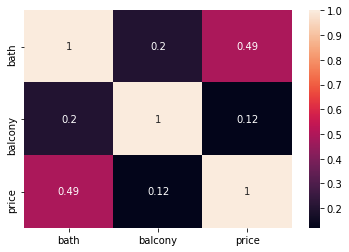

In [ ]:
realtion = hp_new.corr()
sns.heatmap(realtion, annot = True, linewidths= 0, linecolor= 'black');

# Z-score

Z- score gives an idea of how far a data point is from the mean.

z-score = (data - mean_data) / standard deviation 

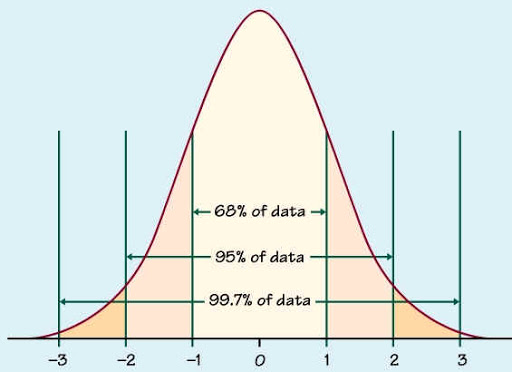

In [ ]:
# calculating z-score for hp_new data set
hp_new['z-score'] = (hp_new['price'] - hp_new['price'].mean()) / (hp_new['price'].std())
hp_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,z-score
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.565558
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.079640
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.382753
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.119667
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.470448
